# Exploratory Data Analysis - Student Performance Data Set

Before beginning, import the necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Purpose
This notebook serves as exploratory analysis of a dataset containing student grades and student information. The analysis explores a data set that will hopefully be used to model how student attributes combine to affect student achievement.

## The Data Set
The raw data consists of two `.csv` files previously downloaded from the [UCI Machine Learning Repository - Student Performance Data Set](http://archive.ics.uci.edu/ml/datasets/Student+Performance). The data set contains information on student achievement, demographic information, and lifestyle factors of Portuguese secondary students. The data was collected using schools reports and student questionnaires. The data is split into two files, one for the mathematics subject area and one for Portuguese language.

### Comments

#### Variable Names, Values

In the subsequent analysis, variable names have been left unchanged from the original files. A full list of variable names is listed in the README.md document in the project's root folder.

Some useful variable names or values to know in the analysis that follows are:
- **school** - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
- **sex** - student's sex (binary: "F" - female or "M" - male)
- **Medu** - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Fedu** - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
- **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
- **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
- **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **G1** - first period grade (numeric: from 0 to 20)
- **G2** - second period grade (numeric: from 0 to 20)
- **G3** - final grade (numeric: from 0 to 20, output target)


#### A Note from the Source

The following is a note from the original source regarding the correlations between and prediction from the G1, G2, and G3 variables:

> In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

### Loading and Checking the Data

First, load the dataset and check the shape of each pandas dataframe:

In [2]:
math_file = '../data/interim/math.csv'
lang_file = '../data/interim/lang.csv'

math = pd.read_csv(math_file, index_col=0)
lang = pd.read_csv(lang_file, index_col=0)

print(f"Math: {math.shape}")
print(f"Language: {lang.shape}")

Math: (395, 33)
Language: (649, 33)


Then, look at the variables and their datatypes:

In [3]:
print('Math:')
print(math.info())
print('Language:')
print(lang.info())

Math:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  high

Both dataframes, mathematics and language, have the same variables with the same datayptes (this observation was checked in the [`data-collection.ipynb`](data-collection.ipynb) notebook). Next, check the summary statistics for the final grades in each dataframe:

In [4]:
print('Math:')
print(math['G3'].describe())
print('Language:')
print(lang['G3'].describe())

Math:
count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64
Language:
count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


Finally, out of curiosity, I want to check the mean age of the students in the data set:

In [5]:
print(f"Mean student age, math: {math['age'].mean():.1f}")
print(f"Mean student age, language: {lang['age'].mean():.1f}")

Mean student age, math: 16.7
Mean student age, language: 16.7


## Exploratory Analysis

### Grade Distributions

To begin the analysis, plot the distributions of grades for term 1, term 2, and the final grade for each math and language:

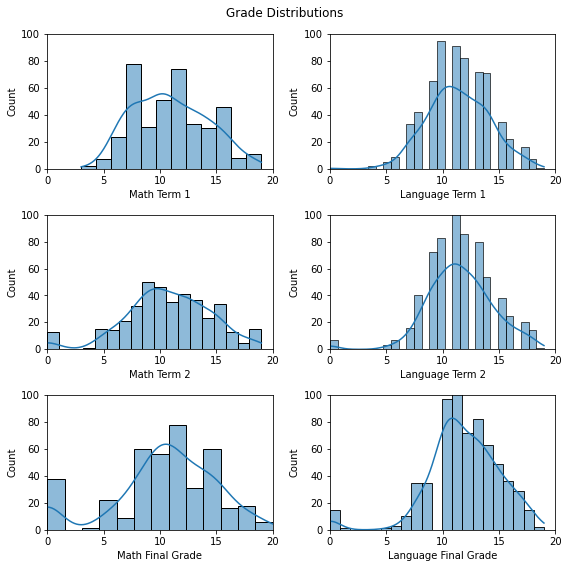

In [6]:
_ = plt.figure(figsize=(8,8))

_ = plt.subplot(3, 2, 1)
_ = sns.histplot(math['G1'], kde=True)
_ = plt.xlabel('Math Term 1')
_ = plt.ylim(0,100)
_ = plt.xlim(0,20)

_ = plt.subplot(3, 2, 2)
_ = sns.histplot(lang['G1'], kde=True)
_ = plt.xlabel('Language Term 1')
_ = plt.ylim(0,100)
_ = plt.xlim(0,20)

_ = plt.subplot(3, 2, 3)
_ = sns.histplot(math['G2'], kde=True)
_ = plt.xlabel('Math Term 2')
_ = plt.ylim(0,100)
_ = plt.xlim(0,20)

_ = plt.subplot(3, 2, 4)
_ = sns.histplot(lang['G2'], kde=True)
_ = plt.xlabel('Language Term 2')
_ = plt.ylim(0,100)
_ = plt.xlim(0,20)

_ = plt.subplot(3, 2, 5)
_ = sns.histplot(math['G3'], kde=True)
_ = plt.xlabel('Math Final Grade')
_ = plt.ylim(0,100)
_ = plt.xlim(0,20)

_ = plt.subplot(3, 2, 6)
_ = sns.histplot(lang['G3'], kde=True)
_ = plt.xlabel('Language Final Grade')
_ = plt.ylim(0,100)
_ = plt.xlim(0,20)

_ = plt.suptitle('Grade Distributions')
_ = plt.tight_layout()

plt.show()

The distributions look more or less as expected. The most unusual feature is the grades of **0** that grow over time and begin to skew the distributions.

### Correlations

Next, use a heatmap to view correlations between numerical variables for mathematics:

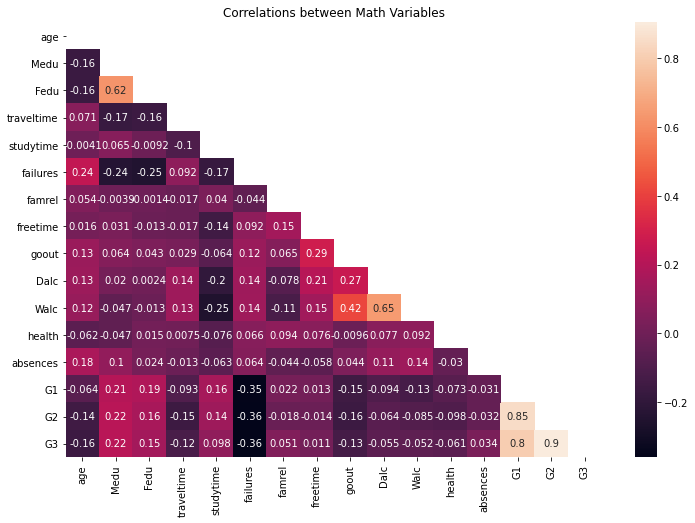

In [7]:
matrix = np.triu(math.corr())
_ = plt.figure(figsize=(12,8))
_ = sns.heatmap(math.corr(), annot = True, mask=matrix)
_ = plt.title('Correlations between Math Variables')
plt.show()

And same for language:

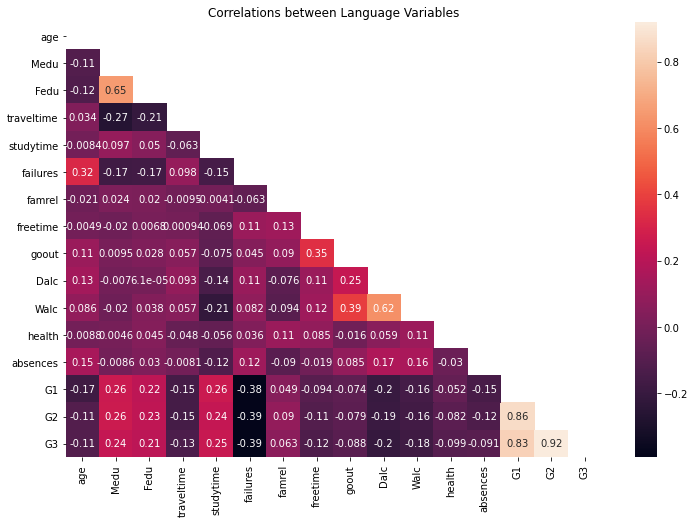

In [8]:
matrix = np.triu(lang.corr())
_ = plt.figure(figsize=(12,8))
_ = sns.heatmap(lang.corr(), annot = True, mask=matrix)
_ = plt.title('Correlations between Language Variables')
plt.show()

#### Obervations from Correlations:
- Grades are correlated
    - Strongly with other grades (obviously)
    - Mostly with father's and mother's education, but weakly
    - Study time, but also weakly
    - Failures in other classes are negatively correlated with grades
- Other strong correlations:
    - Father's and mother's education, maybe not too surprising
    - Older students tend to fail more than younger students
    - Going out with friends and having free time
    - Going out with friends and using alcohol on the weekend
    - Weekend and weekday alcohol use
- Other observations:
    - At a glance, correlations are higher in the language dataset
    - Less educated parents live farther away
    - Students who drink alcohol on the weekend report less study time
    
#### A Closer Look at Select Correlations

Final grades and parents' education:

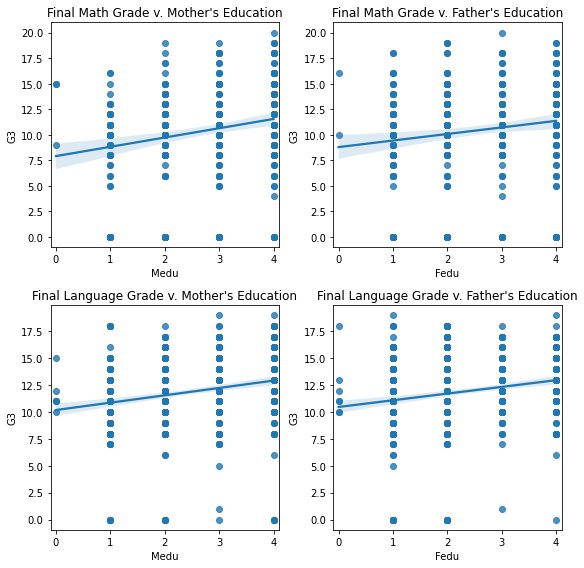

In [9]:
_ = plt.figure(figsize=(8,8))

_ = plt.subplot(2,2,1)
_ = sns.regplot(x='Medu', y='G3', data=math)
_ = plt.title("Final Math Grade v. Mother's Education")
_ = plt.xlim(-.1,4.1)

_ = plt.subplot(2,2,2)
_ = sns.regplot(x='Fedu', y='G3', data=math)
_ = plt.title("Final Math Grade v. Father's Education")
_ = plt.xlim(-.1,4.1)


_ = plt.subplot(2,2,3)
_ = sns.regplot(x='Medu', y='G3', data=lang)
_ = plt.title("Final Language Grade v. Mother's Education")
_ = plt.xlim(-.1,4.1)


_ = plt.subplot(2,2,4)
_ = sns.regplot(x='Fedu', y='G3', data=lang)
_ = plt.title("Final Language Grade v. Father's Education")
_ = plt.xlim(-.1,4.1)


_ = plt.tight_layout()
plt.show()

Final grades and study time:

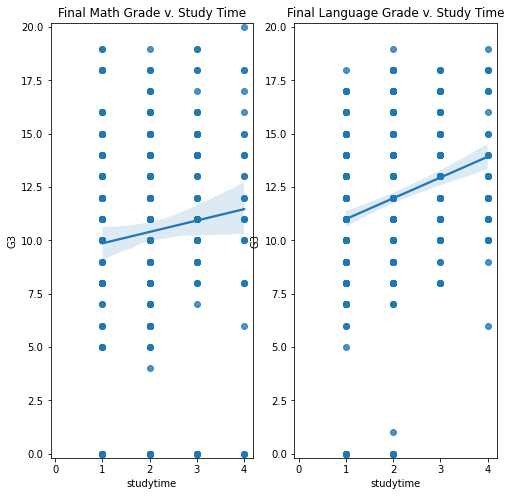

In [10]:
_ = plt.figure(figsize=(8,8))

_ = plt.subplot(1,2,1)
_ = sns.regplot(x='studytime', y='G3', data=math)
_ = plt.title("Final Math Grade v. Study Time")
_ = plt.xlim(-.1,4.2)
_ = plt.ylim(-.2, 20.2)

_ = plt.subplot(1,2,2)
_ = sns.regplot(x='studytime', y='G3', data=lang)
_ = plt.title("Final Language Grade v. Study Time")
_ = plt.xlim(-.1,4.2)
_ = plt.ylim(-.2, 20.2)

The negative correlation between final grades and previous failures:

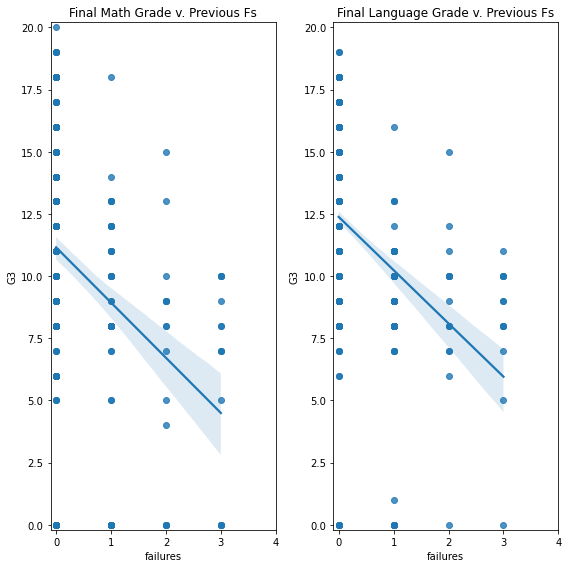

In [11]:
_ = plt.figure(figsize=(8,8))

_ = plt.subplot(1,2,1)
_ = sns.regplot(x='failures', y='G3', data=math)
_ = plt.title("Final Math Grade v. Previous Fs")
_ = plt.xlim(-.1,4)
_ = plt.ylim(-.2, 20.2)

_ = plt.subplot(1,2,2)
_ = sns.regplot(x='failures', y='G3', data=lang)
_ = plt.title("Final Language Grade v. Previous Fs")
_ = plt.xlim(-.1,4)
_ = plt.ylim(-.2, 20.2)

_= plt.tight_layout()
plt.show()

Final grades and weekday alcohol use:

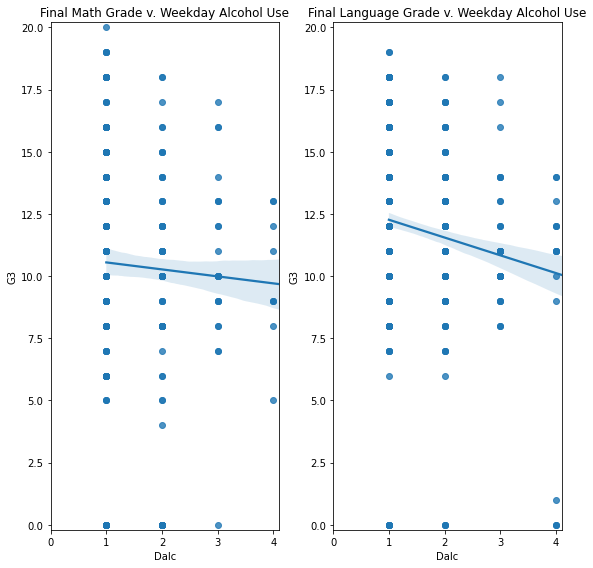

In [12]:
_ = plt.figure(figsize=(8,8))

_ = plt.subplot(1,2,1)
_ = sns.regplot(x='Dalc', y='G3', data=math)
_ = plt.title("Final Math Grade v. Weekday Alcohol Use")
_ = plt.xlim(0,4.1)
_ = plt.ylim(-.2, 20.2)

_ = plt.subplot(1,2,2)
_ = sns.regplot(x='Dalc', y='G3', data=lang)
_ = plt.title("Final Language Grade v. Weekday Alcohol Use")
_ = plt.xlim(0,4.1)
_ = plt.ylim(-.2, 20.2)

_= plt.tight_layout()
plt.show()

### School and Gender Differences

#### Gender

First, look at the mean grades for females and males in **math**:

In [13]:
math[['sex','G1','G2','G3']].groupby(by='sex').mean()

,G1,G2,G3
sex,,,
F,10.620192,10.389423,9.966346
M,11.229947,11.074866,10.914439


Do the same for **language**:

In [14]:
lang[['sex','G1','G2','G3']].groupby(by='sex').mean()

,G1,G2,G3
sex,,,
F,11.637076,11.822454,12.253264
M,11.056391,11.206767,11.406015


Then look at the summary statistics for final grades in **math** for females and males:

In [15]:
math[['sex','G3']].groupby(by='sex').describe()

G3                                                 
     count       mean       std  min  25%   50%   75%   max
sex                                                        
F    208.0   9.966346  4.622338  0.0  8.0  10.0  13.0  19.0
M    187.0  10.914439  4.495297  0.0  9.0  11.0  14.0  20.0

And for **language**:

In [16]:
lang[['sex','G3']].groupby(by='sex').describe()

G3                                                  
     count       mean       std  min   25%   50%   75%   max
sex                                                         
F    383.0  12.253264  3.124147  0.0  10.0  12.0  14.0  19.0
M    266.0  11.406015  3.320690  0.0  10.0  11.0  13.0  19.0

Finally, use boxplots to compare the spread of final grades for males and females:

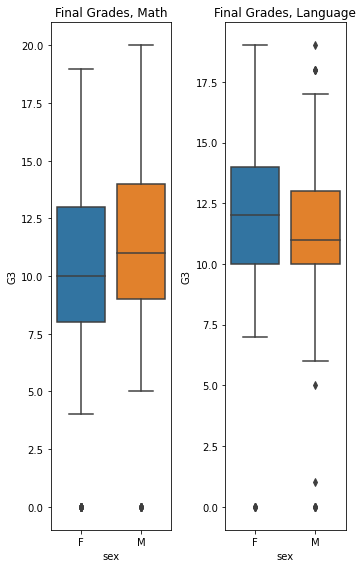

In [17]:
_ = plt.figure(figsize=(5,8))

_ = plt.subplot(1,2,1)
_ = sns.boxplot(x=math['sex'], y = math['G3'])
_ = plt.title("Final Grades, Math")

_ = plt.subplot(1,2,2)
_ = sns.boxplot(x=lang['sex'], y = lang['G3'])
_ = plt.title("Final Grades, Language")

_ = plt.tight_layout()

On average and across terms, males do better in math and females do better in language. Differences between categories can also be observed for schools:

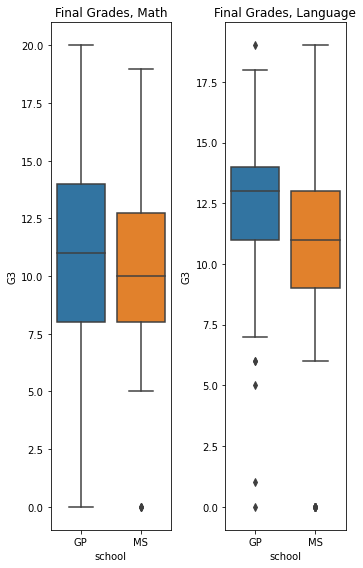

In [18]:
_ = plt.figure(figsize=(5,8))

_ = plt.subplot(1,2,1)
_ = sns.boxplot(x=math['school'], y = math['G3'])
_ = plt.title("Final Grades, Math")

_ = plt.subplot(1,2,2)
_ = sns.boxplot(x=lang['school'], y = lang['G3'])
_ = plt.title("Final Grades, Language")

_ = plt.tight_layout()

Grades look generally higher at Gabriel Pereira school than at Mousinho da Silveira.

## Conclusions and Next Steps
Are the differences between mean grades for males and females, and across schools, statistically significant? Are other categorical, non-binary variables, such as parent's occupation, influential on the final grade? Hypothesis tests and other statistical tests should be used to investigate these questions.

Furthermore, although no single attribute was highly correlated to final grades, the observed correlations do begin to paint a picture of student success - e.g. students with higly educated parents who spend more time studying tend to do better. Multiple linear or logistic regression should be used to model how multiple attributes correlate to final grades